# Goal
A/B tests play a huge role in website optimization. Analyzing A/B tests data is a very important
data scientist responsibility. Especially, data scientists have to make sure that results are
reliable, trustworthy, and conclusions can be drawn.

Furthermore, companies often run tens, if not hundreds, of A/B tests at the same time. Manually
analyzing all of them would require lot of time and people. Therefore, it is common practice to
look at the typical A/B test analysis steps and try to automate as much as possible. This frees
up time for the data scientists to work on more high level topics.

Analyze results from an A/B test. Also, design an algorithm to automate some steps.

# Challenge Description



Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than
any other Spanish-speaking country. She therefore went and talked to the international team in
charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanishspeaking countries had the same translation of the site which was written by a Spaniard. They
agreed to try a test where each country would have its one translation written by a local. That is,
Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican
and so on. Obviously, nothing would change for users from Spain.

After they run the test however, they are really surprised cause the test is negative. I.e., it
appears that the non-localized translation was doing better!

Asked to:

* Confirm that the test is actually negative. That is, it appears that the old version of the
site with just one translation across Spain and LatAm performs better
* Explain why that might be happening. Are the localized translations really worse?
* If you identified what was wrong, design an algorithm that would return FALSE if the
same problem is happening in the future and TRUE if everything is good and the results
can be trusted.

# Data

## Columns:
### Test Table
* user_id : the id of the user. Unique by user. Can be joined to user id in the other table.
For each user, we just check whether conversion happens the first time they land on the
site since the test started.
* date : when they came to the site for the first time since the test started
* source : marketing channel: Ads, SEO, Direct . Direct means everything except for ads
and SEO. Such as directly typing site URL on the browser, downloading the app w/o
coming from SEO or Ads, referral friend, etc.
* device : device used by the user. It can be mobile or web
* browser_language : in browser or app settings, the language chosen by the user. It can
be EN, ES, Other (Other means any language except for English and Spanish)
* ads_channel : if marketing channel is ads, this is the site where the ad was displayed. It
can be: Google, Facebook, Bing, Yahoo ,Other. If the user didn't come via an ad, this
field is NA
* browser : user browser. It can be: IE, Chrome, Android_App, FireFox, Iphone_App,
Safari, Opera
* conversion : whether the user converted (1) or not (0). This is our label. A test is
considered successful if it increases the proportion of users who convert.
* test : users are randomly split into test (1) and control (0). Test users see the new
translation and control the old one. For Spain-based users, this is obviously always 0
since there is no change there.

### User Table`

* user_id : the id of the user. It can be joined to user id in the other table
* sex : user sex: Male or Female
* age : user age (self-reported)
* country : user country based on ip address


In [2]:
# read the data into python
import pandas as pd
import numpy as np
test_table = pd.read_csv('test_table.csv')
user_table = pd.read_csv('user_table.csv')

user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
dtype: object

In [5]:
#look at the data type
test_table.dtypes

user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
dtype: object

In [6]:
user_table.dtypes

user_id     int64
sex        object
age         int64
country    object
dtype: object

In [7]:
# look the several row of data
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,12/3/2015,Direct,Web,ES,NaN,IE,1,0
1,497851,12/4/2015,Ads,Web,ES,Google,IE,0,1
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,0,1


In [8]:
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [13]:
test_table.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [12]:
test_table.drop_duplicates

<bound method DataFrame.drop_duplicates of         user_id        date  source  device browser_language ads_channel  \
0        315281   12/3/2015  Direct     Web               ES         NaN   
1        497851   12/4/2015     Ads     Web               ES      Google   
2        848402   12/4/2015     Ads     Web               ES    Facebook   
3        290051   12/3/2015     Ads  Mobile            Other    Facebook   
4        548435  11/30/2015     Ads     Web               ES      Google   
...         ...         ...     ...     ...              ...         ...   
453316   425010   12/4/2015     SEO     Web               ES         NaN   
453317   826793   12/1/2015     SEO  Mobile               ES         NaN   
453318   514870   12/2/2015     Ads  Mobile               ES        Bing   
453319   785224   12/4/2015     SEO  Mobile               ES         NaN   
453320   241662   12/4/2015     Ads     Web               ES    Facebook   

            browser  conversion  test  
0   

In [16]:
user_table.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [23]:
user_table.drop_duplicates

<bound method DataFrame.drop_duplicates of         user_id sex  age    country
0        765821   M   20     Mexico
1        343561   F   27  Nicaragua
2        118744   M   23   Colombia
3        987753   F   27  Venezuela
4        554597   F   20      Spain
...         ...  ..  ...        ...
452862   756215   F   27  Venezuela
452863    36888   M   18  Argentina
452864   800559   M   28    Bolivia
452865   176584   M   19      Chile
452866   314649   M   24     Mexico

[452867 rows x 4 columns]>

In [38]:
distinct_user = np.unique(user_table['user_id'])
print('distinct user number:', distinct_user.size )
print('all user number:', user_table['user_id'].size)

distinct user number: 452867
all user number 452867


In [41]:
#Looks like the user table is busted and we have some user ids missing. When joining, we have to be careful to do not lose the user ids in the test table, but not in the user table.
test_user = np.unique(test_table['user_id'])
print('distinct user number of test table:', test_user.size )
print('all user number for user table:', user_table['user_id'].size)
print('different number of user between test and user table', test_user.size-user_table['user_id'].size)


distinct user number of test table: 453321
all user number for user table: 452867
different number of user between test and user table 454


In [60]:
# join two table
all_table = test_table.merge(user_table, on = 'user_id', how = 'left')
all_table.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [61]:
all_table.head()


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,12/3/2015,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,12/4/2015,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [110]:
# look at the result of conversion to make sure it is ture spain converts much better than the rest of LatAm countries.
all_table_conversion = all_table.groupby(['country','test'],dropna=False, as_index= False).mean()
all_table_conversion



,country,test,user_id,conversion,age
0,Argentina,0,496688.319367,0.015071,27.124198
1,Argentina,1,499662.469888,0.013725,27.132782
2,Bolivia,0,496550.053333,0.049369,27.196937
3,Bolivia,1,499866.009508,0.047901,26.997309
4,Chile,0,505092.208566,0.048107,27.188268
5,Chile,1,498097.984622,0.051295,27.232800
6,Colombia,0,499438.290867,0.052089,27.178455
7,Colombia,1,498809.285926,0.050571,27.106777
8,Costa Rica,0,496111.016165,0.052256,27.222556
9,Costa Rica,1,498039.871650,0.054738,27.073990


In [128]:
# implement t-test on different test set except spanish
data_no_spanish = all_table[all_table['country'] != 'Spain']
data_no_spanish_conversion = data_no_spanish[['country', 'test', 'conversion']]


In [132]:
#separate into two set
data_no_spanish_conversion_0 = data_no_spanish_conversion[data_no_spanish_conversion['test'] == 0]
data_no_spanish_conversion_0 = data_no_spanish_conversion_0.dropna()

In [139]:
data_no_spanish_conversion_1 = data_no_spanish_conversion[data_no_spanish_conversion['test'] == 1]
data_no_spanish_conversion_1 = data_no_spanish_conversion_1.dropna()


In [148]:
print("the mean of test 0", data_no_spanish_conversion_0['conversion'].mean())
print("the mean of test 1", data_no_spanish_conversion_1['conversion'].mean())

the mean of test 0 0.04829179055749524
the mean of test 1 test          1.000000
conversion    0.043411
dtype: float64


D:\temp\ipykernel_93540\2172221294.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("the mean of test 1", data_no_spanish_conversion_1.mean())


the mean of test 0 0.04829179055749524
the mean of test 1 0.043411161678422794


In [141]:
#conduct two-sample t-test for two set
import scipy.stats as stats
print(data_no_spanish_conversion_1.var(), data_no_spanish_conversion_0.var())

test          0.000000
conversion    0.041527
dtype: float64 test          0.00000
conversion    0.04596
dtype: float64


D:\temp\ipykernel_93540\548338839.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data_no_spanish_conversion_1.var(), data_no_spanish_conversion_0.var())


In [143]:
stats.ttest_ind(a = data_no_spanish_conversion_1['conversion'], b = data_no_spanish_conversion_0['conversion'], equal_var= True )

Ttest_indResult(statistic=-7.382252163053968, pvalue=1.559329277881674e-13)

two hypothesis for two sample t-test:

$H_0$: $\mu_1$ = $\mu_2$ (two population means are equal)

$H_1$: $\mu_1$ $\neq$ $\mu_2$ (two population mean are not equal)

let set the significant value equal 0.05 ($\alpha$ = 0.05)

The p-value is 1.559329277881674e-13, which is less than the 0.05, so we reject the null hypothesis of the test.
That's mean, we have sufficient evidence to say that the mean of conversion rate between two test are different


Look at the mean of conversion for two test, the mean of test 1 is 4.8%, the mean of test 0 is 4.3%
That’s a 10% drop, which would be dramatic if it were true. The most likely reason for weird A/B test results are:

1.We didn't collect enough data.

2.Some bias has been introduced in the experiment so that test/control people are not really random.


In data science, whenever result appear too bad or too good to be true, they are not true.

Firstly, let's plot day by day, to see if these weired result have been constantly happening
or they just started happening all of a sudden.

<AxesSubplot:xlabel='date', ylabel='test_vs_control'>

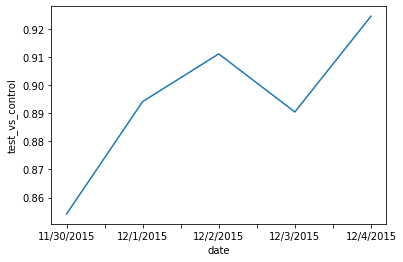

In [183]:
data_test_by_day = data_no_spanish.groupby(['test', 'date'], as_index = False).mean()
data_test_by_day_test0 = data_test_by_day[data_test_by_day['test'] == 0]
data_test_by_day_test1 = data_test_by_day[data_test_by_day['test'] == 1]
data_test_by_day_test = data_test_by_day_test1.merge(data_test_by_day_test0, on = 'date').set_index('date')
data_test_by_day_ratio = data_test_by_day_test['conversion_x']/data_test_by_day_test['conversion_y']
data_test_by_day_ratio.plot.line(ylabel = 'test_vs_control')



From the plot, we notice a couple of things:
1. Test has constantly been worse than control and there is relatively little variance across days. That
probably means that we do have enough data, but there was some bias in the experiment set up.
2. On a side note, we just ran it for 5 days. We should always run the test for at least 1 full week to
capture weekly patterns, 2 weeks would be much better.

Time to find out the bias! Likely, there is for some reason some segment of users more likely to end up in
test or in control, this segment had a significantly above/below conversion rate and this affected the overall
results.

In an ideal world, the distribution of people in test and control for each segment should be the same. There
are many ways to DIFDL this. One way is to build a decision tree where the variables are the user
dimensions and the outcome variable is whether the user is in test or control. If the tree splits, it means
that for given values of that variable you are more likely to end up in test or control. But this should be
impossible! Therefore, if the randomization worked, the tree should not split at all (or at least not be able to
separate the two classes well).